In [1]:
%matplotlib inline
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


# Fit a model to the Iris data

In [52]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X[y < 2], y[y < 2], 
    test_size=.5, 
    random_state=random_state
)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)

y_score = classifier.decision_function(X_test)
y_hat = classifier.predict(X_test)

# Calculate accuracy metrics

In [53]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_hat)
precision = metrics.precision_score(y_true=y_test, y_pred=y_hat)
recall = metrics.recall_score(y_true=y_test, y_pred=y_hat)
classification_report= metrics.classification_report(y_true=y_test, y_pred=y_hat)

average_precision = metrics.average_precision_score(y_true=y_test, y_score=y_score)


print('accuracy: {:.3f}'.format(accuracy))
print('precision: {:.3f}'.format(precision))
print('recall: {:.3f}'.format(recall))
print('Average precision-recall: {0:0.2f}'.format(average_precision))
print('=========================================================')
print('classification_report: \n{}'.format(classification_report))

accuracy: 0.760
precision: 0.750
recall: 0.808
Average precision-recall: 0.88
classification_report: 
             precision    recall  f1-score   support

          0       0.77      0.71      0.74        24
          1       0.75      0.81      0.78        26

avg / total       0.76      0.76      0.76        50



# Precision-Recall Curve

In [54]:
metrics.precision_recall_curve?

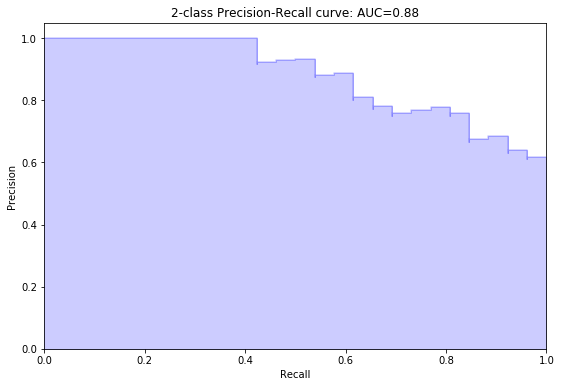

In [55]:
# plot precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_true=y_test, probas_pred=y_score)
plt.figure(figsize=(9,6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

# Receiver Operating Characteristic (ROC)

In [9]:
metrics.roc_curve?

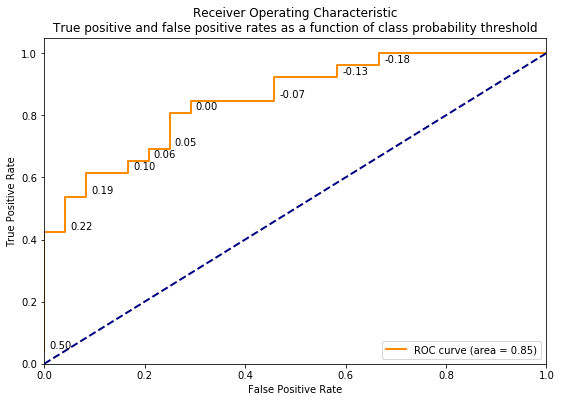

In [56]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_score)
roc_auc = metrics.auc(x=false_positive_rate, y=true_positive_rate)

plt.figure(figsize=(9,6))
lw = 2
plt.plot(false_positive_rate, true_positive_rate, 
         color='darkorange', lw=lw, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic\n\
True positive and false positive rates as a function of class probability threshold'
         )
plt.legend(loc="lower right")
[plt.annotate("{:.2f}".format(threshold), xy=(fpr, tpr), xytext=(fpr + 0.01, tpr + 0.01)) \
 for tpr, fpr, threshold in list(zip(true_positive_rate, false_positive_rate, thresholds))[0:-1:2]]
plt.show()
